## Cox Proportional Hazard Model

In [ ]:
install.packages("KMsurv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(KMsurv)
library(survival)

In [ ]:
# load the kidney data
data(kidney)
print(kidney)

    time delta type
1    1.5     1    1
2    3.5     1    1
3    4.5     1    1
4    4.5     1    1
5    5.5     1    1
6    8.5     1    1
7    8.5     1    1
8    9.5     1    1
9   10.5     1    1
10  11.5     1    1
11  15.5     1    1
12  16.5     1    1
13  18.5     1    1
14  23.5     1    1
15  26.5     1    1
16   2.5     0    1
17   2.5     0    1
18   3.5     0    1
19   3.5     0    1
20   3.5     0    1
21   4.5     0    1
22   5.5     0    1
23   6.5     0    1
24   6.5     0    1
25   7.5     0    1
26   7.5     0    1
27   7.5     0    1
28   7.5     0    1
29   8.5     0    1
30   9.5     0    1
31  10.5     0    1
32  11.5     0    1
33  12.5     0    1
34  12.5     0    1
35  13.5     0    1
36  14.5     0    1
37  14.5     0    1
38  21.5     0    1
39  21.5     0    1
40  22.5     0    1
41  22.5     0    1
42  25.5     0    1
43  27.5     0    1
44   0.5     1    2
45   0.5     1    2
46   0.5     1    2
47   0.5     1    2
48   0.5     1    2
49   0.5     1    2


In [ ]:
# see the data's numbers of row and column
print(dim(kidney))

[1] 119   3


In [ ]:
# use the type variable to generate two teams, 0 and 1
kidney$group = kidney$type - 1

In [ ]:
print(head(kidney, 10))

   time delta type group
1   1.5     1    1     0
2   3.5     1    1     0
3   4.5     1    1     0
4   4.5     1    1     0
5   5.5     1    1     0
6   8.5     1    1     0
7   8.5     1    1     0
8   9.5     1    1     0
9  10.5     1    1     0
10 11.5     1    1     0


In [ ]:
# fit the parametric model (weibull)
fit = survreg(Surv(time, delta) ~ group, data = kidney, dist = "weibull")
summary(fit)


Call:
survreg(formula = Surv(time, delta) ~ group, data = kidney, dist = "weibull")
            Value Std. Error     z      p
(Intercept) 3.597      0.339 10.61 <2e-16
group       0.623      0.469  1.33   0.18
Log(scale)  0.129      0.167  0.77   0.44

Scale= 1.14 

Weibull distribution
Loglik(model)= -122   Loglik(intercept only)= -122.9
	Chisq= 1.93 on 1 degrees of freedom, p= 0.16 
Number of Newton-Raphson Iterations: 7 
n= 119 


+ Weibull regression
  + $\hat{\gamma} = \frac{1}{\hat{\sigma}} = \frac{1}{Scale} = \frac{1}{1.14}$
  + $(\hat{\alpha}, \hat{\beta}) = \frac{-1}{\hat{\sigma}} \times coef = \frac{-1}{1.14} \times coef$
  + $S(t) = exp\{-t^{\gamma}exp(\alpha + \beta Z)\}$

In [ ]:
# the gamma.hat = 1 / sigma.hat = 1 / Scale
# (alpha.hat, beta.hat) = -fit$coef / gamma.hat
gamma_hat = 1/1.14
beta_hat = -gamma_hat * fit$coef
print(beta_hat)

(Intercept)       group 
 -3.1552604  -0.5462697 


In [ ]:
# fit the cox proportional model, which is a semiparametric model
fit2 = coxph(Surv(time, delta) ~ as.factor(type), method = "breslow", data = kidney)
summary(fit2)

Call:
coxph(formula = Surv(time, delta) ~ as.factor(type), data = kidney, 
    method = "breslow")

  n= 119, number of events= 26 

                    coef exp(coef) se(coef)      z Pr(>|z|)
as.factor(type)2 -0.6182    0.5389   0.3981 -1.553     0.12

                 exp(coef) exp(-coef) lower .95 upper .95
as.factor(type)2    0.5389      1.856     0.247     1.176

Concordance= 0.497  (se = 0.051 )
Likelihood ratio test= 2.45  on 1 df,   p=0.1
Wald test            = 2.41  on 1 df,   p=0.1
Score (logrank) test = 2.49  on 1 df,   p=0.1


In [ ]:
# list all the number of failure times
summary(survfit(fit2))

Call: survfit(formula = fit2)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  0.5    119       6    0.931  0.0301        0.874        0.992
  1.5    103       1    0.919  0.0330        0.856        0.986
  2.5     98       2    0.894  0.0384        0.822        0.972
  3.5     89       2    0.867  0.0435        0.786        0.957
  4.5     79       2    0.838  0.0488        0.748        0.940
  5.5     73       1    0.823  0.0514        0.728        0.930
  6.5     66       1    0.807  0.0542        0.707        0.920
  8.5     55       2    0.768  0.0611        0.658        0.898
  9.5     49       1    0.748  0.0646        0.631        0.886
 10.5     45       1    0.726  0.0683        0.604        0.873
 11.5     40       1    0.702  0.0721        0.574        0.858
 15.5     25       2    0.630  0.0862        0.482        0.824
 16.5     23       1    0.594  0.0916        0.439        0.804
 18.5     20       1    0.556  0.0965        0.395        0.781
 23.5    

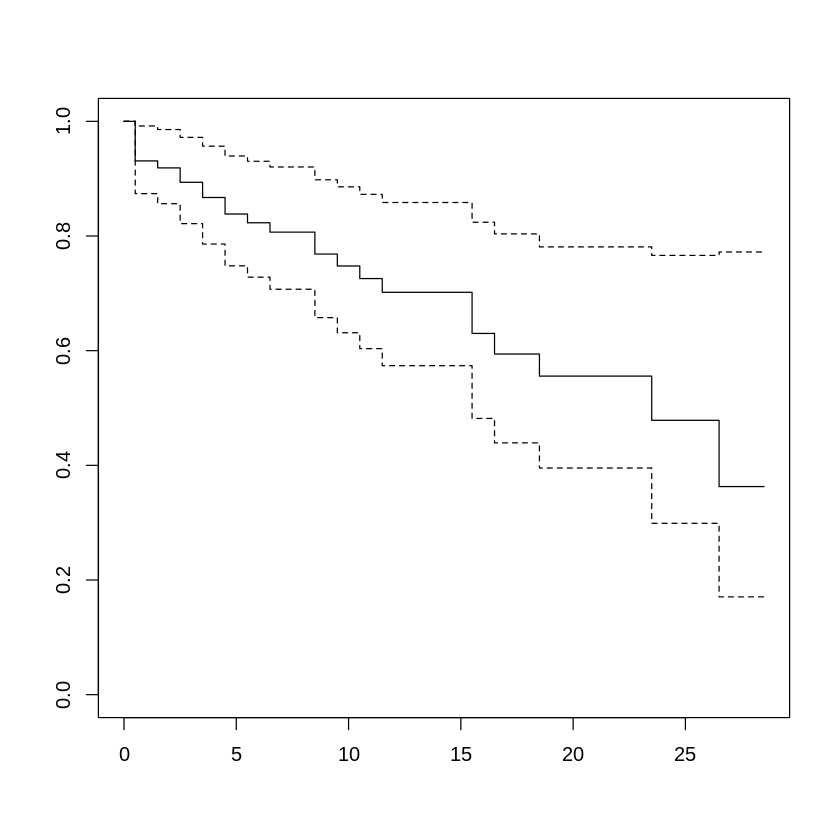

In [ ]:
plot(survfit(fit2))

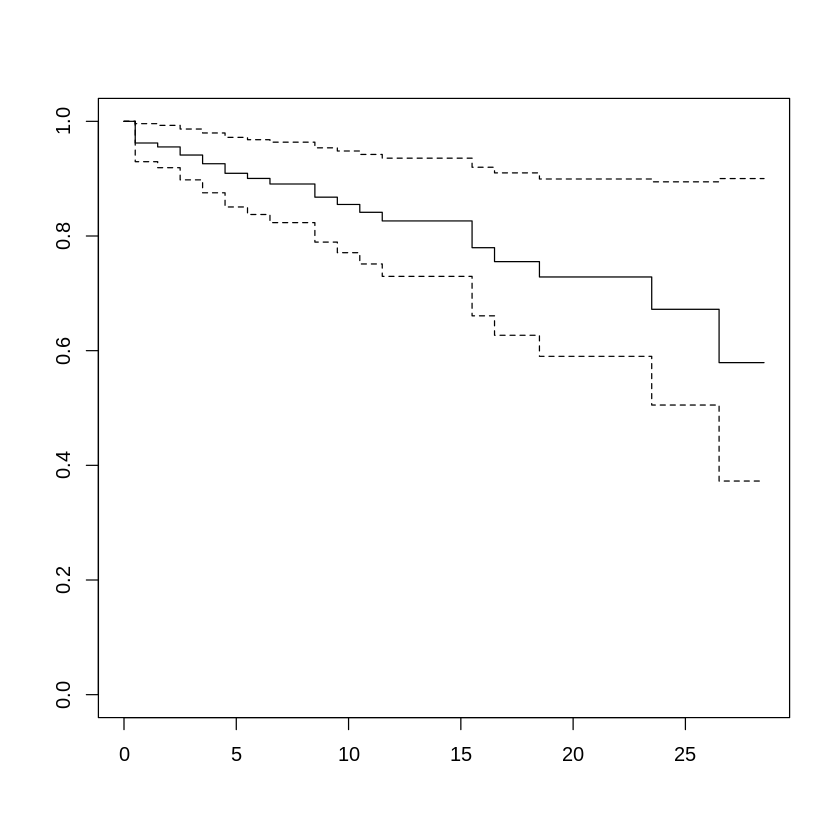

In [ ]:
plot(survfit(fit2, newdata = data.frame(type = 2)))

### Simulation



#### Step1: generate the data
+ n: sample size
+ u: random variables from uniform
+ Z: covariate from Ber(p = 0.5)
+ e: event time
+ C: censoring
+ d: observation time

$\gamma = 2$, $\beta = 0.5$, $Z\sim Ber(p = 0.5)$

模擬一筆樣本數為100的存活資料。

使用cdf inverse function以及服從uniform(0, 1)的隨機變數來換回event time。

使用exponential亂數生成censoring。

最後期望獲得的資料需要有：觀察時間，狀態，Covariate。

In [ ]:
n = 100
u = runif(n, 0, 1)
Z = rbinom(n, 1, 0.5)
e = sqrt(-log(u) / exp((0.5 * Z)))
C = rexp(n, 0.2)
d = rep(NA, n)
t = rep(NA, n)

for (i in 1:n){
  t[i] = min(e[i], C[i])
  d[i] = 1 * (e[i] <= C[i])
}

dt = data.frame(Observation = t,t Delta = d, Covariate = Z)
print(head(dt))

  Observation Delta Covariate
1   0.5539071     1         0
2   1.3242736     1         1
3   0.7928264     1         1
4   0.0390929     0         0
5   0.5260324     1         1
6   0.9520999     1         1


#### Step2: estimate the beta hat

利用cox model估計 $\beta$，理論上 $\beta$ 的估計值 $\hat{\beta}$ 要接近 true value 0.5。

In [ ]:
model = coxph(Surv(Observation, Delta) ~ as.factor(Covariate), method = "breslow", data = dt)
summary(model)

Call:
coxph(formula = Surv(Observation, Delta) ~ as.factor(Covariate), 
    data = dt, method = "breslow")

  n= 100, number of events= 84 

                        coef exp(coef) se(coef)     z Pr(>|z|)
as.factor(Covariate)1 0.3645    1.4398   0.2282 1.597     0.11

                      exp(coef) exp(-coef) lower .95 upper .95
as.factor(Covariate)1      1.44     0.6946    0.9205     2.252

Concordance= 0.532  (se = 0.033 )
Likelihood ratio test= 2.59  on 1 df,   p=0.1
Wald test            = 2.55  on 1 df,   p=0.1
Score (logrank) test = 2.58  on 1 df,   p=0.1


In [ ]:
beta_hat = unname(model$coef)
print(beta_hat)

[1] 0.3644878


In [ ]:
summary(survfit(model))

Call: survfit(formula = model)

  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.146     96       1   0.9917 0.00834     0.975494        1.000
 0.149     95       1   0.9834 0.01190     0.960348        1.000
 0.150     94       1   0.9751 0.01469     0.946675        1.000
 0.205     91       1   0.9665 0.01719     0.933382        1.000
 0.224     90       1   0.9579 0.01942     0.920582        0.997
 0.236     89       1   0.9493 0.02146     0.908164        0.992
 0.284     88       1   0.9407 0.02336     0.896031        0.988
 0.290     87       1   0.9321 0.02515     0.884077        0.983
 0.308     86       1   0.9235 0.02685     0.872305        0.978
 0.348     84       1   0.9147 0.02852     0.860459        0.972
 0.405     82       1   0.9058 0.03015     0.848607        0.967
 0.417     81       1   0.8969 0.03173     0.836838        0.961
 0.436     80       1   0.8880 0.03325     0.825181        0.956
 0.447     79       1   0.8791 0.03472     0.813581       

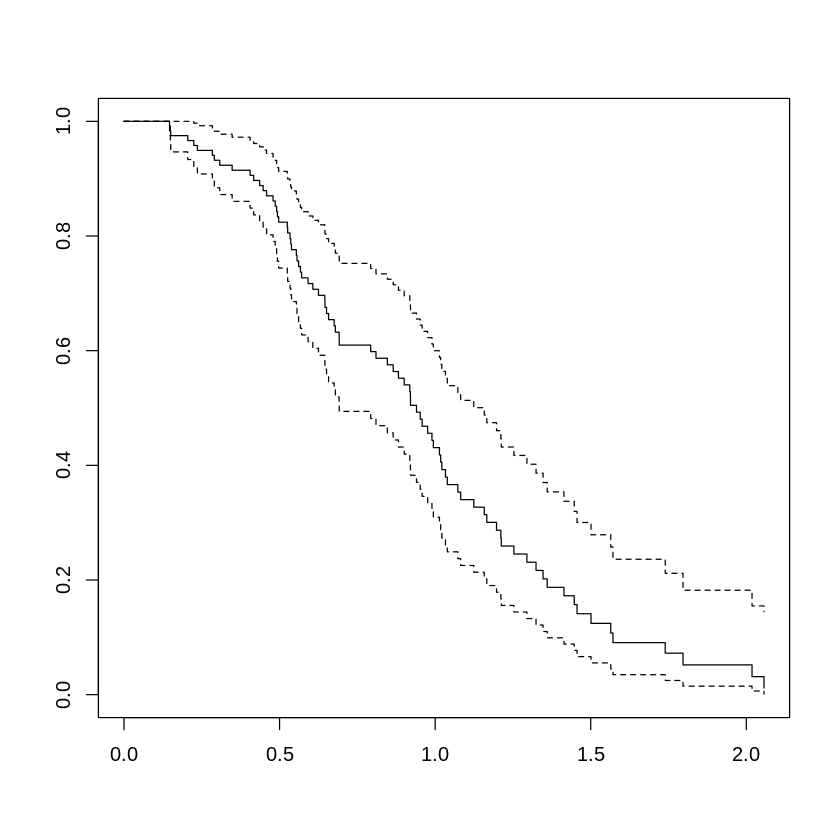

In [ ]:
plot(survfit(model))

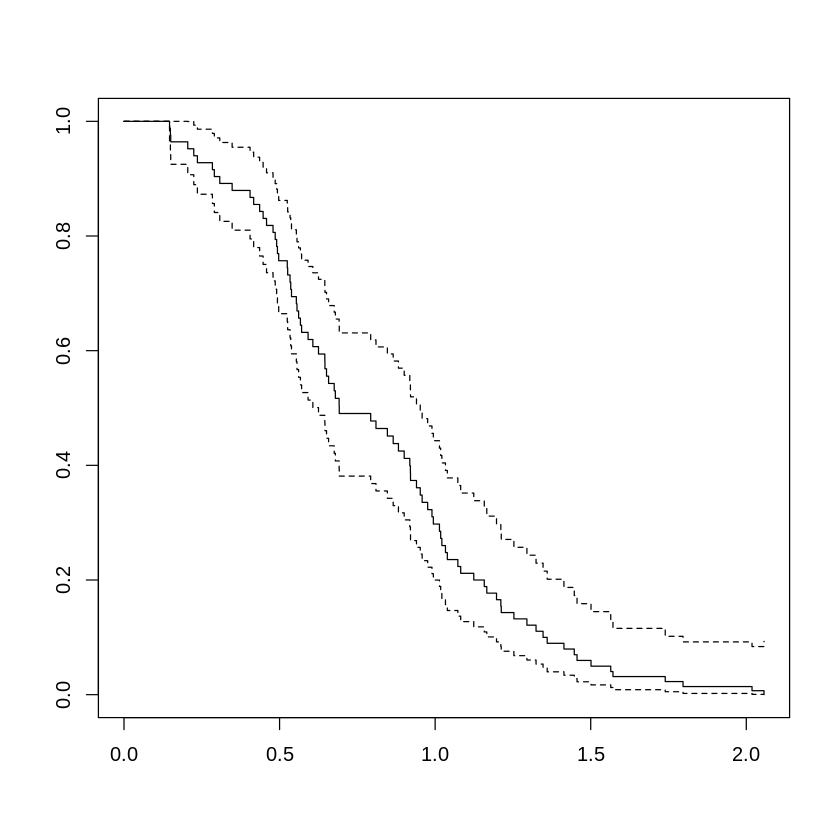

In [ ]:
plot(survfit(model, newdata = data.frame(Covariate = 1)))

#### step3: estimate the big lambda

有了$\hat{\beta}$，接下來著手準備估計$\hat{\Lambda}_0(t)$。

在此之前需要先將資料按照觀察時間排序。

In [ ]:
# order the observation time
ord = order(dt$Observation)
# sort the data by the ord
dt = dt[ord, ]
print(head(dt, 20))

   Observation Delta Covariate
4   0.03909290     0         0
48  0.06738684     0         0
77  0.10493840     0         0
98  0.13425942     0         0
14  0.14640472     1         1
83  0.14910123     1         1
86  0.15018439     1         0
59  0.17048727     0         1
27  0.18602895     0         1
31  0.20490074     1         1
54  0.22426053     1         0
62  0.23587841     1         0
75  0.28413010     1         1
35  0.29031715     1         0
9   0.30781477     1         1
57  0.31151183     0         1
69  0.34752938     1         0
38  0.35664880     0         0
88  0.40512669     1         1
60  0.41674381     1         0


確定有幾個event time。

In [ ]:
# check the number of event time we need to calculate
print(sum(dt[, 2]))

[1] 84


確定event time的位置。

In [ ]:
# find the position which delta is 1, and set as index
# index = 1 * (dt$Delta == 1)
index = c(dt$Delta)
print(index)

  [1] 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 [38] 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


要估計$\hat{\Lambda}_0(t)$，首先要先估計$d\hat{\Lambda}_0(t)$

In [ ]:
d_Lambda_hat = c()
n = c()
d = c()
L = length(dt[, 1])
for (i in 1:L){
  numerator = dt[i, 2]
  denominator = sum(exp(beta_hat * dt[c(i:L), 3]))
  n = c(n, numerator)
  d = c(d, denominator)
  d_Lambda_hat = c(d_Lambda_hat, (numerator/denominator))
}

print(d_Lambda_hat)

  [1] 0.000000000 0.000000000 0.000000000 0.000000000 0.008320319 0.008421200
  [7] 0.008524557 0.000000000 0.000000000 0.008816119 0.008929463 0.009009917
 [13] 0.009091833 0.009212426 0.009298084 0.000000000 0.009553882 0.000000000
 [19] 0.009739992 0.009878522 0.009977081 0.010122488 0.010272197 0.010378810
 [25] 0.000000000 0.010698550 0.010865924 0.011038617 0.000000000 0.011344135
 [31] 0.011474301 0.011667046 0.000000000 0.012072636 0.012286194 0.012439022
 [37] 0.012665860 0.012828342 0.013069739 0.013242819 0.000000000 0.013603106
 [43] 0.013790703 0.014070072 0.000000000 0.000000000 0.014882438 0.015208312
 [49] 0.015548777 0.015904835 0.016161887 0.016546926 0.000000000 0.000000000
 [55] 0.017545581 0.018000299 0.018330249 0.018827124 0.019351687 0.019906319
 [61] 0.020493681 0.020922460 0.021369564 0.022047921 0.022770757 0.023301347
 [67] 0.024110214 0.024977257 0.025908987 0.026598118 0.027657262 0.028804255
 [73] 0.030050500 0.030981510 0.032428008 0.033514827 0.03521404

In [ ]:
dt = cbind(dt, numerator = n, denominator = d, dLambda = d_Lambda_hat)
print(dt)

    Observation Delta Covariate numerator denominator     dLambda
4    0.03909290     0         0         0  124.187701 0.000000000
48   0.06738684     0         0         0  123.187701 0.000000000
77   0.10493840     0         0         0  122.187701 0.000000000
98   0.13425942     0         0         0  121.187701 0.000000000
14   0.14640472     1         1         1  120.187701 0.008320319
83   0.14910123     1         1         1  118.747924 0.008421200
86   0.15018439     1         0         1  117.308148 0.008524557
59   0.17048727     0         1         0  116.308148 0.000000000
27   0.18602895     0         1         0  114.868372 0.000000000
31   0.20490074     1         1         1  113.428595 0.008816119
54   0.22426053     1         0         1  111.988819 0.008929463
62   0.23587841     1         0         1  110.988819 0.009009917
75   0.28413010     1         1         1  109.988819 0.009091833
35   0.29031715     1         0         1  108.549042 0.009212426
9    0.307